Fashion dataset

here we use the convolution neural network to classify the images. importing necessary libraries

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

loading dataset

In [44]:
(train,train_labels),(test,test_labels)=fashion_mnist.load_data()

In [45]:
print(len(train))

60000


In [46]:
classes=np.unique(train_labels)
nclasses=len(classes)
nclasses

10

In [47]:
print("Train shape ",train.shape,train_labels.shape)
print("Test shape ",test.shape,test_labels.shape)

Train shape  (60000, 28, 28) (60000,)
Test shape  (10000, 28, 28) (10000,)


labeling the target

In [48]:

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

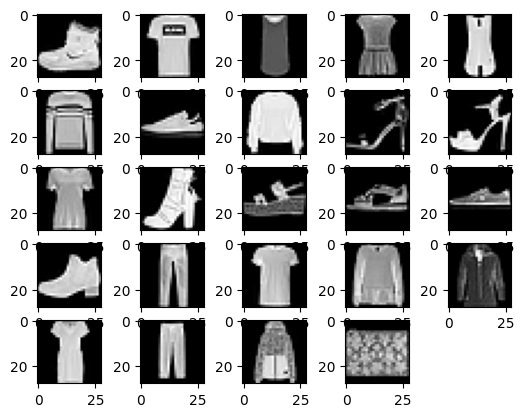

In [49]:
for i in range(1,25):
    plt.subplot(5,5,i)
    plt.imshow(train[i-1], cmap='gray')
plt.show()

In [50]:
row,col=train.shape[1:]

reshape the data trainning and testing

In [51]:
train_data=train.reshape(train.shape[0],row,col)
train_data=train_data.astype('float32')

test_data=test.reshape(test.shape[0],row,col)
test_data=test_data.astype('float32')

input_shape=(row,col)

performing one hot encoding

In [52]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

split the data for train and test 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(train_data,train_labels,test_size=0.2,shuffle=True)

creating the sequential modal. use convoluiton layer for extracting features and use dense layer for prediction use soft max

In [54]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='linear'),
    MaxPool2D(pool_size=(2,2),padding='same'),
    Dropout(0.1),

    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='tanh'),
    MaxPool2D(pool_size=(2,2),padding='same'),
    Dropout(0.1),

    Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),padding='same'),
    Dropout(0.1),
    Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),padding='same'),
    Dropout(0.1),
    Flatten(),
    Dense(1500,activation='relu'),
    Dense(units=nclasses,activation='softmax'),
])

compiling the model it is the classification problem use categorical crossentroypy and use adam optimizers

In [55]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.001),metrics=['accuracy'])

displaing the summary of the model

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     1,537,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,940,350 (7.40 MB)

 Trainable params: 1,940,350 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

training the model

In [57]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=1)

Epoch 1/20


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.6687 - loss: 0.9595 - val_accuracy: 0.8582 - val_loss: 0.3761
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8605 - loss: 0.3735 - val_accuracy: 0.8755 - val_loss: 0.3355
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8750 - loss: 0.3290 - val_accuracy: 0.8868 - val_loss: 0.3005
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8832 - loss: 0.3101 - val_accuracy: 0.8903 - val_loss: 0.2902
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8930 - loss: 0.2826 - val_accuracy: 0.8944 - val_loss: 0.2815
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8953 - loss: 0.2712 - val_accuracy: 0.8975 - val_loss: 0.2773
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9004 - loss: 0.2582 - val_accuracy: 0.8961 - val_loss: 0.2772
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9024 - loss: 0.2590 - val_accurac

evaluating the model

In [58]:
eval=model.evaluate(x_test,y_test)
print(f"loss ",eval[0])
print(f"selected metric {model.metrics_names[1]}:{eval[1]}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9137 - loss: 0.2529
loss  0.26267385482788086
selected metric compile_metrics:0.9096666574478149


print the prediction 

In [59]:
prediction=model.predict(x_test)
for i in range(10):
    print(f"prediction :{prediction[i]},actual")

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
prediction :[1.9080921e-06 6.1176704e-13 9.9685788e-01 3.1783621e-12 3.4747627e-06
 5.1236779e-16 3.1367836e-03 1.5050835e-14 6.9994332e-12 5.6953758e-15],actual
prediction :[9.72617805e-01 1.15163326e-04 4.61336953e-04 5.12612006e-03
 8.94929050e-04 6.62778859e-07 2.07761675e-02 5.47255013e-07
 7.05145339e-06 2.30877397e-08],actual
prediction :[3.8482658e-14 5.9268493e-20 2.3428931e-16 4.6404197e-16 6.6343359e-21
 1.0000000e+00 7.9501877e-17 2.5996732e-14 5.0709035e-13 6.2405220e-12],actual
prediction :[1.7855376e-23 1.0000000e+00 6.4225334e-17 1.3634419e-16 1.7122509e-20
 2.7734821e-30 8.6987238e-25 6.2506026e-34 8.0823311e-29 1.5552233e-32],actual
prediction :[2.4323122e-05 1.4171803e-06 1.6843404e-01 5.2757827e-08 8.3151174e-01
 2.9340079e-08 2.7875001e-05 8.5102933e-08 3.3297513e-07 6.7499016e-08],actual
prediction :[7.8409950e-20 1.0000000e+00 2.9857903e-15 2.9915181e-12 1.3388723e-16
 1.1339305e-24 1.0759931e-19 6.6784433e-28 3.4916796e-2

plt the image with prediction and actual labels

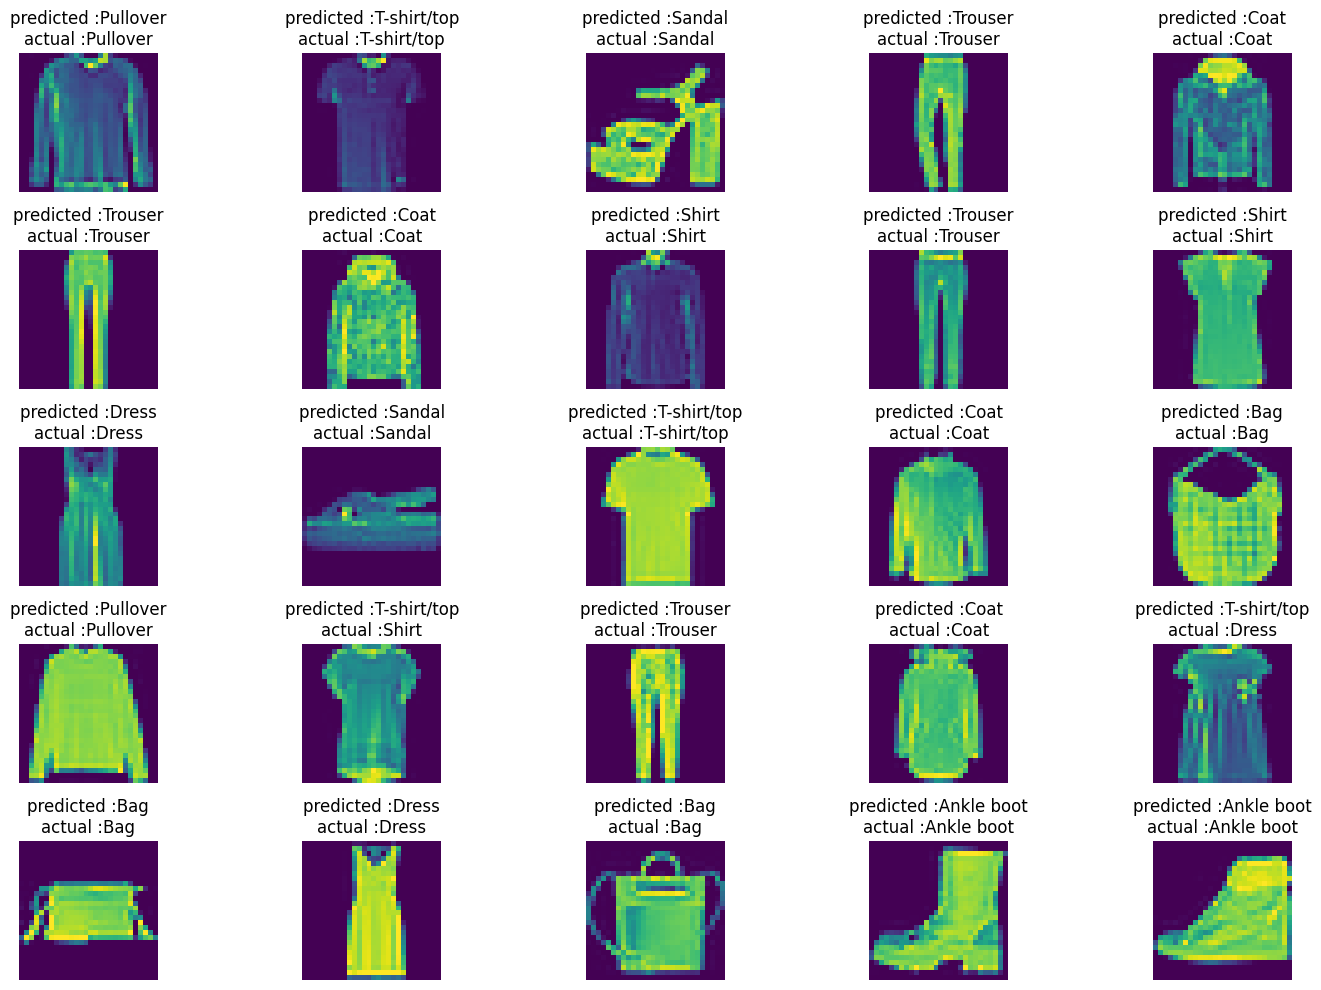

In [60]:
n=25
plt.figure(figsize=(15,10))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    prediction_label=np.argmax(prediction[i])
    actual_label=np.argmax(y_test[i])
    predict=label_names[prediction_label]
    actual=label_names[actual_label]
    plt.title(f"predicted :{predict}\nactual :{actual}")
    plt.axis('off')
plt.tight_layout()
plt.show()